# **Libraries to Import**

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
roc_curve, classification_report, f1_score)


# **Dataset Overview**

In [50]:
df=pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

display(df.columns)

display(df.info())

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

In [51]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [52]:
df.shape

(7043, 21)

In [53]:
display(len(df.select_dtypes(include='number').columns))

display(len(df.select_dtypes(exclude='number').columns))

3

18

In [54]:
display(df.select_dtypes(include='number').sample(5))

display(df.select_dtypes(exclude='number').sample(5))

,SeniorCitizen,tenure,MonthlyCharges
5462,0,64,70.15
6382,0,38,74.05
1873,0,72,70.65
4916,0,2,79.55
6921,0,54,79.85


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
3164,2603-HVKCG,Male,No,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3143.65,No
1063,7143-BQIBA,Male,No,No,Yes,No,DSL,Yes,No,No,Yes,Yes,No,Month-to-month,No,Bank transfer (automatic),612.95,No
6068,3945-GFWQL,Female,No,Yes,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,480.6,Yes
4457,7611-YKYTC,Male,Yes,Yes,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),1573.95,No
4396,0023-HGHWL,Male,No,No,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,25.1,Yes


In [55]:
df=df.drop(columns=['customerID'])

In [56]:
df['TotalCharges']=pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [57]:
display(df['TotalCharges'].describe())
display(df['TotalCharges'].median())


count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

1397.475

In [58]:
mean_imputer=SimpleImputer(strategy='mean')

df['TotalCharges']=mean_imputer.fit_transform(df[['TotalCharges']])

In [59]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [60]:
df[df['tenure']==0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [61]:
df.drop(df[df['tenure']==0].index, axis=0, inplace=True)

In [62]:
df[df['tenure']==0].index

Index([], dtype='int64')

In [63]:
df['SeniorCitizen']=df['SeniorCitizen'].map({ 0:'No' , 1:'Yes'})
df['SeniorCitizen'].unique()

array(['No', 'Yes'], dtype=object)

In [64]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [65]:
df.describe(include=['object','bool'])

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


# **Data visualization**

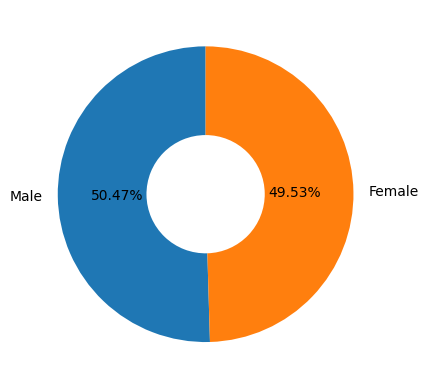

In [66]:
gender_counts= df['gender'].value_counts()

plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.2f%%',
    startangle=90,
    wedgeprops=dict(width=0.6)
)

plt.show()

* **Customers are almost 50 percent male and 50 percent female**

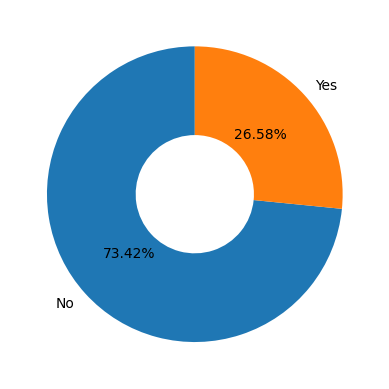

In [67]:
churn_counts= df['Churn'].value_counts()

plt.pie(
    churn_counts,
    labels=churn_counts.index,
    autopct='%1.2f%%',
    startangle=90,
    wedgeprops=dict(width=0.6)
)

plt.show()

* **almost 26.58 percent of customer are likely to churn**

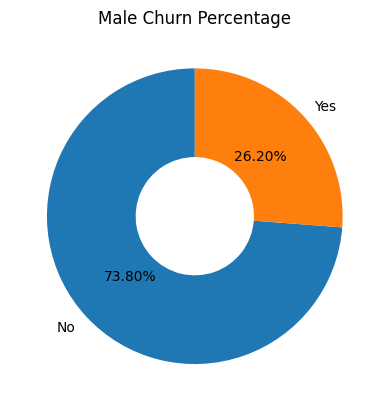

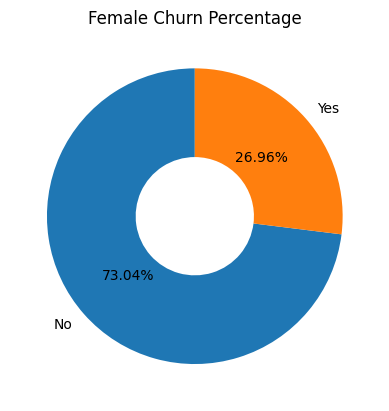

In [68]:
churn_counts= df.groupby('gender')['Churn'].value_counts()

male_churn=churn_counts['Male']

plt.pie(
    male_churn,
    labels=male_churn.index,
    autopct='%1.2f%%',
    startangle=90,
    wedgeprops=dict(width=0.6)
)
plt.title('Male Churn Percentage')
plt.show()


female_churn=churn_counts['Female']

plt.pie(
    female_churn,
    labels=female_churn.index,
    autopct='%1.2f%%',
    startangle=90,
    wedgeprops=dict(width=0.6)
)
plt.title('Female Churn Percentage')
plt.show()

* **both male and female has the 26 percentages of churn**

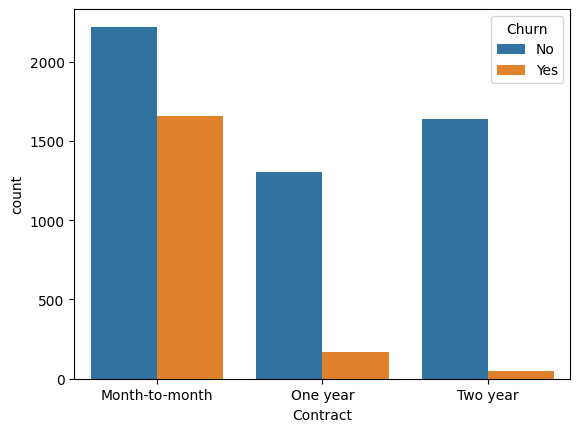

In [69]:
sns.countplot(
    data=df,
    x='Contract',
    hue='Churn'
)

plt.show()

* **customer with monthly  contract are more likely to churn**

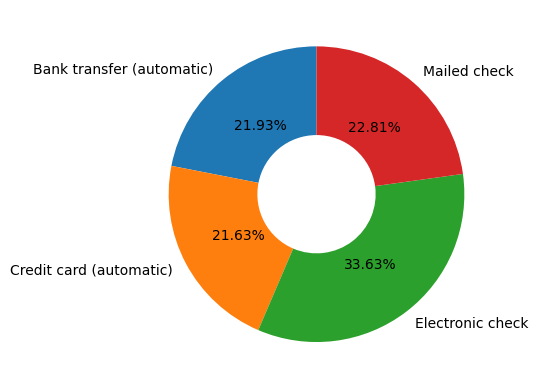

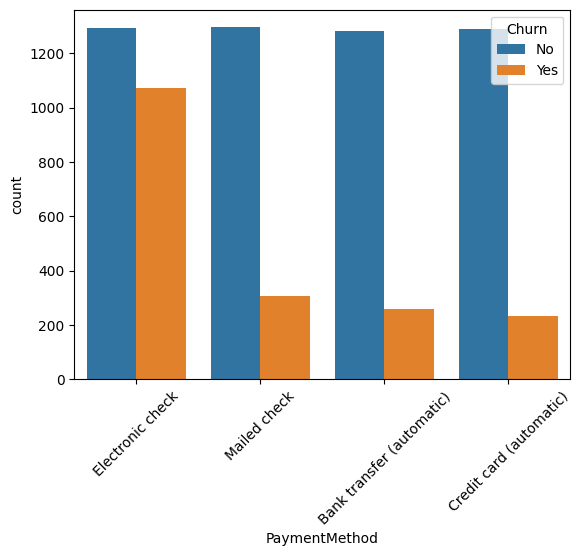

In [70]:
payment_counts=df.groupby('PaymentMethod').count()

plt.pie(
    payment_counts['Churn'],
    labels=payment_counts.index,
    autopct='%1.2f%%',
    startangle=90,
    wedgeprops=dict(width=0.6)
)

plt.show()


sns.countplot(
    data=df,
    x='PaymentMethod',
    hue='Churn'
)
plt.xticks(rotation=45)
plt.show()

* **customers paying with electronic checks are most likely to churn**

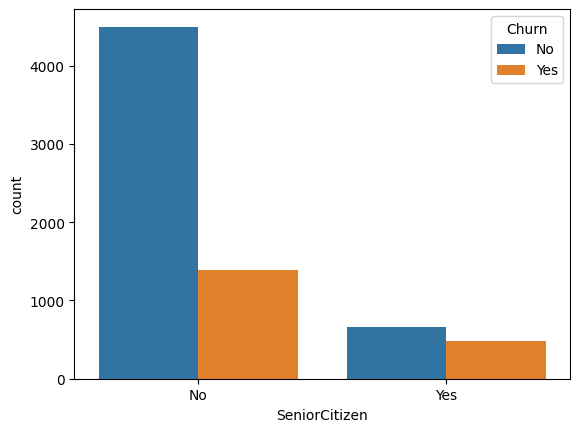

In [71]:
sns.countplot(
    data=df,
    x='SeniorCitizen',
    hue='Churn'
)

plt.show()

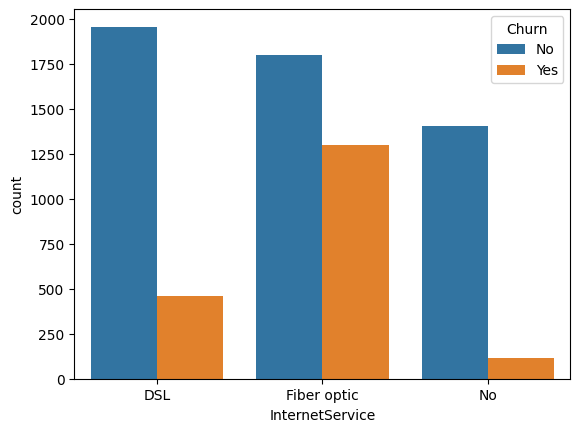

In [72]:
df.columns



sns.countplot(
    data=df,
    x='InternetService',
    hue='Churn'
)

plt.show()

* **People using fiber optic are more likely to churn**

In [73]:
df.groupby(['gender','Churn','InternetService']).count()

SeniorCitizen  Partner  Dependents  tenure  \
gender Churn InternetService                                               
Female No    DSL                        965      965         965     965   
             Fiber optic                889      889         889     889   
             No                         690      690         690     690   
       Yes   DSL                        219      219         219     219   
             Fiber optic                664      664         664     664   
             No                          56       56          56      56   
Male   No    DSL                        992      992         992     992   
             Fiber optic                910      910         910     910   
             No                         717      717         717     717   
       Yes   DSL                        240      240         240     240   
             Fiber optic                633      633         633     633   
             No                          57       57          57      57   

                              PhoneService  MultipleLines  OnlineSecurity  \
gender Churn InternetService                                                
Female No    DSL                       965            965             965   
             Fiber optic               889            889             889   
             No                        690            690             690   
       Yes   DSL                       219            219             219   
             Fiber optic               664            664             664   
             No                         56             56              56   
Male   No    DSL                       992            992             992   
             Fiber optic               910            910             910   
             No                        717            717             717   
       Yes   DSL                       240            240             240   
             Fiber optic               633            633             633   
             No                         57             57              57   

                              OnlineBackup  DeviceProtection  TechSupport  \
gender Churn InternetService                                                
Female No    DSL                       965               965          965   
             Fiber optic               889               889          889   
             No                        690               690          690   
       Yes   DSL                       219               219          219   
             Fiber optic               664               664          664   
             No                         56                56           56   
Male   No    DSL                       992               992          992   
             Fiber optic               910               910          910   
             No                        717               717          717   
       Yes   DSL                       240               240          240   
             Fiber optic               633               633          633   
             No                         57                57           57   

                              StreamingTV  StreamingMovies  Contract  \
gender Churn InternetService                                           
Female No    DSL                      965              965       965   
             Fiber optic              889              889       889   
             No                       690              690       690   
       Yes   DSL                      219              219       219   
             Fiber optic              664              664       664   
             No                        56               56        56   
Male   No    DSL                      992              992       992   
             Fiber optic              910              910       910   
             No                       717              717       717   
       Yes   DS

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


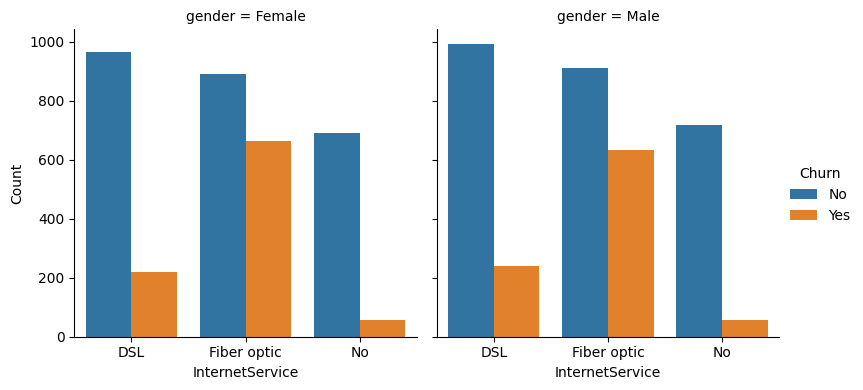

In [74]:
grouped = df.groupby(['gender', 'Churn', 'InternetService']).size().reset_index(name='Count')

sns.catplot(
    data=grouped,
    x='InternetService',
    y='Count',
    hue='Churn',
    col='gender',
    kind='bar',
    height=4,
    aspect=1
)
plt.show()


* **customer using fiber optic service churns the most**

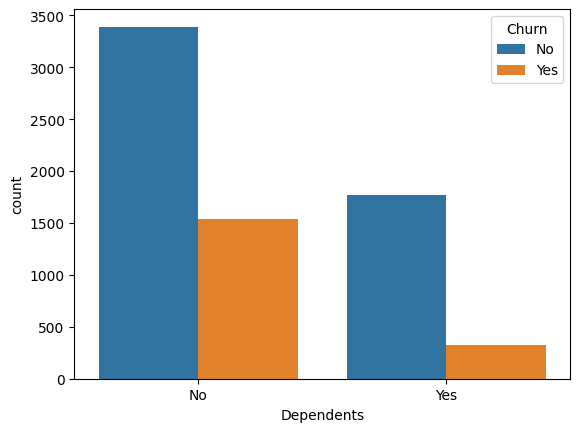

In [75]:
sns.countplot(
    data=df,
    x='Dependents',
    hue='Churn'
)

plt.show()

* **people having no dependents churn more** 

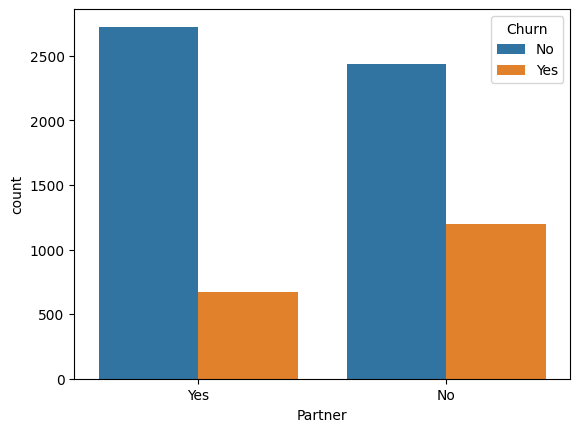

In [76]:
sns.countplot(
    data=df,
    x='Partner',
    hue='Churn'
)

plt.show()

* **people with no partners churn slightly more than people having partners**

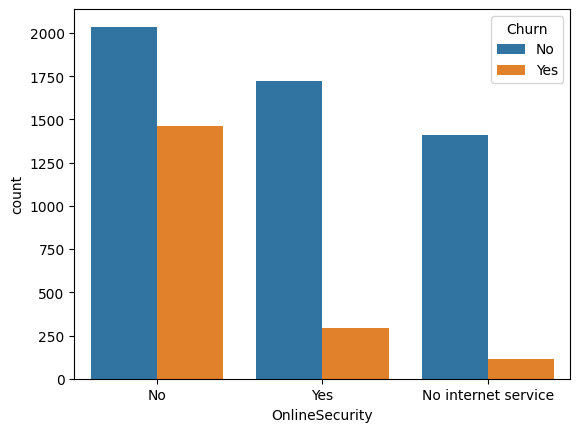

In [77]:
sns.countplot(
    data=df,
    x='OnlineSecurity',
    hue='Churn'
)

plt.show()

* **customers who do not subscribe for company security service churns the most**

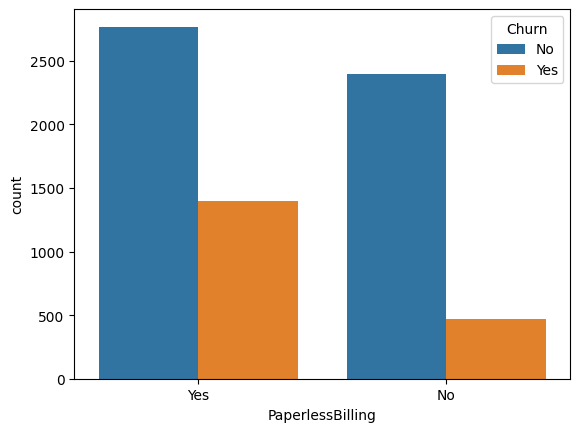

In [78]:
sns.countplot(
    data=df,
    x='PaperlessBilling',
    hue='Churn'
)

plt.show()

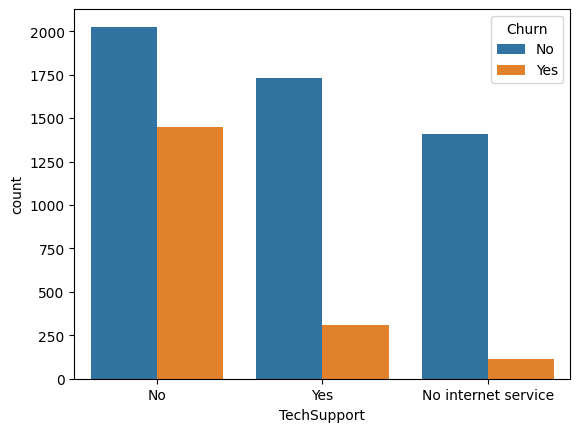

In [79]:
sns.countplot(
    data=df,
    x='TechSupport',
    hue='Churn'
)

plt.show()

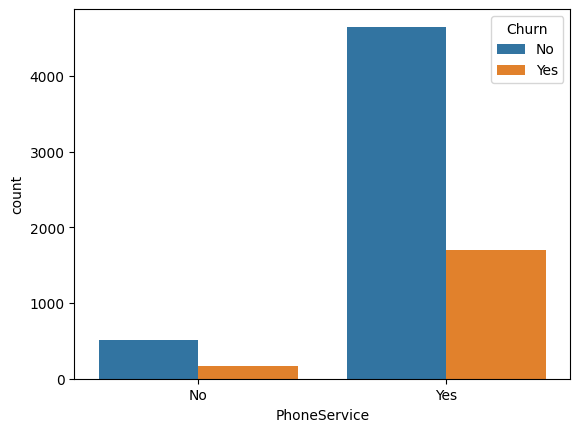

In [80]:
sns.countplot(
    data=df,
    x='PhoneService',
    hue='Churn'
)

plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

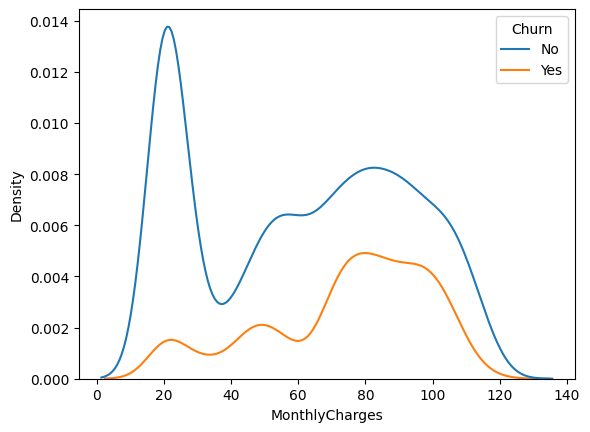

In [81]:
sns.kdeplot(data=df,x='MonthlyCharges', hue='Churn')
plt.show()

* **people with higher montly charges churn more**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

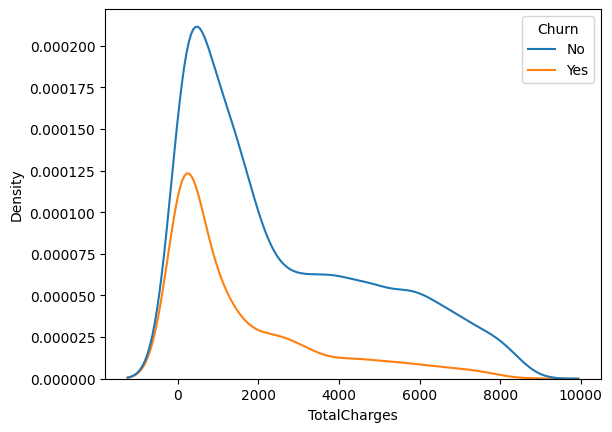

In [82]:
sns.kdeplot(data=df,x='TotalCharges', hue='Churn')
plt.show()

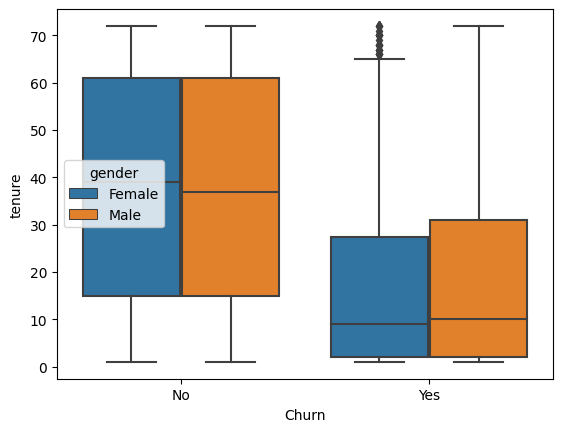

In [83]:
sns.boxplot(
    data=df,
    x='Churn',
    y='tenure',
    hue='gender'
)

plt.show()

In [84]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Data Preprocessing** 

In [85]:
cat_col_le=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService','PaperlessBilling', 'Churn']

cat_col_ohe= list(set(df.select_dtypes(include=['object','category']).columns).difference(set(cat_col_le)))

num_col=df.select_dtypes(include=['int', 'float']).columns


In [86]:
le=LabelEncoder()

for col in cat_col_le:
    df[col]=le.fit_transform(df[col])

In [87]:
ohe=OneHotEncoder(drop='first',sparse_output=False)

one_hot_encoded=ohe.fit_transform(df[cat_col_ohe])


df_encoded = pd.DataFrame(
    one_hot_encoded, 
    columns=ohe.get_feature_names_out(cat_col_ohe),
    index=df.index
)

df_encoded=pd.concat([df.drop(columns=cat_col_ohe),df_encoded],axis=1)

df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingTV_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,DeviceProtection_No internet service,DeviceProtection_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,Contract_One year,Contract_Two year
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
x=df_encoded.drop(columns=['Churn'])

y=df[['Churn']]

In [89]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40, stratify=y)

In [90]:
scaler=StandardScaler()


X_train[num_col]=scaler.fit_transform(X_train[num_col])
X_test[num_col]=scaler.transform(X_test[num_col])

# **Model Training and Evaluation**

## Logistic Regression Model 

In [91]:
lr_model=LogisticRegression(max_iter=100, random_state=0)

lr_model.fit(X_train, y_train)

lr_pred=lr_model.predict(X_test)

accuracy=accuracy_score(y_test,lr_pred)


print(classification_report(y_test,lr_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1033
           1       0.66      0.57      0.61       374

    accuracy                           0.81      1407
   macro avg       0.76      0.73      0.74      1407
weighted avg       0.80      0.81      0.80      1407



## KNN Model 

In [92]:
knn_model=KNeighborsClassifier(n_neighbors=22)

knn_model.fit(X_train,y_train)

knn_pred=knn_model.predict(X_test)

accuracy=knn_model.score(X_test,y_test)

print(accuracy,'\n\n')
print(classification_report(y_test,knn_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.8002842928216063 


              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1033
           1       0.65      0.55      0.59       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407



## Naive Bayes Model 

In [93]:
nb_model=GaussianNB()

nb_model.fit(X_train, y_train)

nb_pred=nb_model.predict(X_test)

accuracy=accuracy_score(y_test, nb_pred)

print(accuracy,'\n\n')

print(classification_report(y_test, nb_pred))

0.6844349680170576 


              precision    recall  f1-score   support

           0       0.94      0.61      0.74      1033
           1       0.45      0.89      0.60       374

    accuracy                           0.68      1407
   macro avg       0.69      0.75      0.67      1407
weighted avg       0.81      0.68      0.70      1407



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Decision Tree Model 

In [94]:
dt_model=DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

dt_model.fit(X_train, y_train)

nb_pred=dt_model.predict(X_test)

accuracy=accuracy_score(y_test, nb_pred)

print(accuracy,'\n\n')
print(classification_report(y_test,nb_pred))

0.8002842928216063 


              precision    recall  f1-score   support

           0       0.82      0.94      0.87      1033
           1       0.72      0.41      0.52       374

    accuracy                           0.80      1407
   macro avg       0.77      0.68      0.70      1407
weighted avg       0.79      0.80      0.78      1407



## Random Forest Model 

In [95]:
rf_model= RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=3,
    max_features='auto',
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

nb_pred=rf_model.predict(X_test)

accuracy=accuracy_score(y_test, nb_pred)

print(accuracy)

/tmp/ipykernel_48/3060759649.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.8095238095238095


## XGB Model 

In [96]:
xg_model=XGBClassifier(
    n_estimators=100,     
    learning_rate=0.04,     
    max_depth=5,           
    subsample=0.8,         
    colsample_bytree=0.8,  
    random_state=42,
    eval_metric='logloss' 
)

xg_model.fit(X_train,y_train)

xg_pred=xg_model.predict(X_test)

accuracy=accuracy_score(y_test, xg_pred)

print(accuracy)

print(classification_report(y_test, xg_pred))

0.8152096659559346
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1033
           1       0.70      0.54      0.61       374

    accuracy                           0.82      1407
   macro avg       0.77      0.73      0.74      1407
weighted avg       0.81      0.82      0.81      1407

